## Relevant resources
- API keys: https://towardsdatascience.com/how-to-hide-your-api-keys-in-python-fb2e1a61b0a0
- python wrapper for binance api: https://github.com/sammchardy/python-binance
- possibly for final version, candlestick charts: https://www.pricederivatives.com/en/how-to-display-candle-stick-bars-from-binance-futures-in-jupyter-notebook/

In [70]:
# import packages
from binance.client import Client
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle



# get api keys for binance 
import os
API_PUBLIC = os.environ.get("PUBLIC_KEY")
API_SECRET = os.environ.get("SECRET_KEY")

Aim is to fetch the top 5 cryptocurrencies by marketcap i.e. BTC, ETH, XRP, BCH and BNB denominated in US dollars (USDt).

In [67]:
crypto_pairs = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'BNBUSDT']

In [68]:
# iteratively loop through cryptocurrencies in crypto_pairs and download them into dataframes
client = Client(API_PUBLIC, API_SECRET)
timestamp = []
for pair in crypto_pairs:
    # determine first available price point
    timestamp.append(client._get_earliest_valid_timestamp(pair, '1d')) 
# assign first available price point to be be the latest in time
timestamp = max(timestamp)

In [69]:
startdate = timestamp #"1 Jan, 2019"
df = {} # create a dictionary that will eventually contain currency dataframes
for pair in crypto_pairs:
    klines = client.get_historical_klines(pair, '1d', startdate)
    
    # delete unwanted data - just keep date, open, high, low, close
    for line in klines:
        del line[6:]
        
    # cast into dataframe and index with date
    df[pair] = pd.DataFrame(klines, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df[pair]['date'] = pd.to_datetime(df[pair]['date'],unit='ms')
    df[pair].set_index('date', inplace=True)
    
    # previous testing showed that the columns of df are objects. convert to float
    df[pair] = df[pair].astype(float)

Save data in pickle format

In [76]:
with open('cryptopairs20102020.pkl', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

Load data from pickle file

In [77]:
with open('cryptopairs20102020.pkl', 'rb') as handle:
    df = pickle.load(handle)

Plot cryptocurrencies 

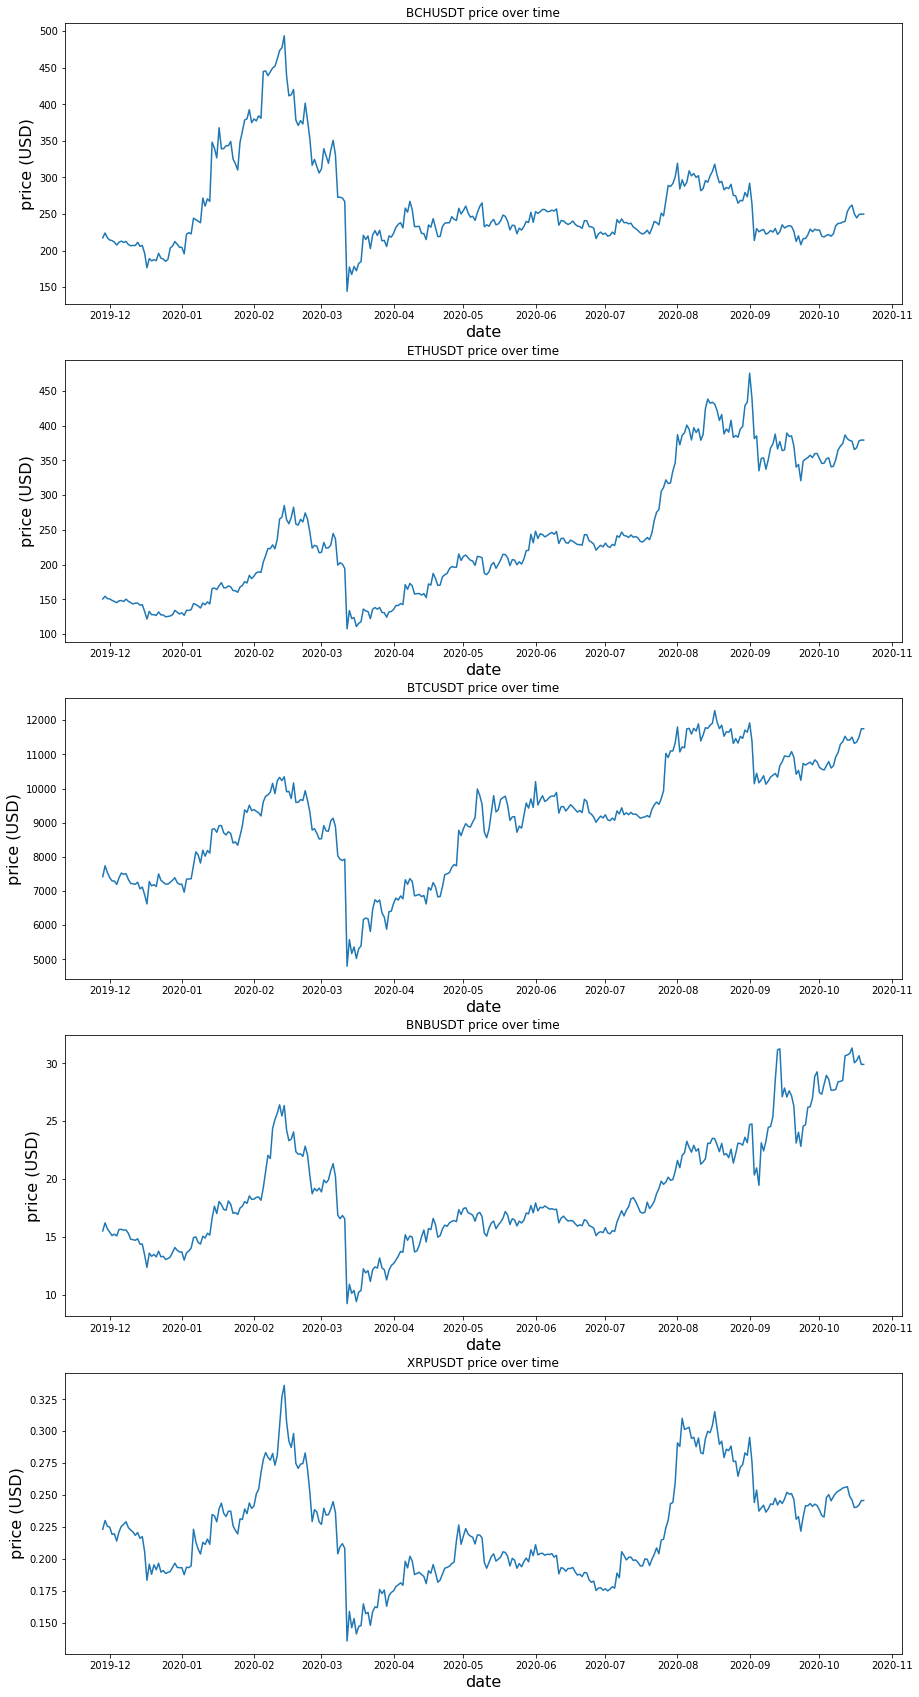

In [102]:
fig, ax = plt.subplots(len(df),figsize=(15, 30))

for i in range(len(df)):
    ax[i].plot(df[list(df.keys())[i]]['close']) # stacked plot of each of the currencies
    ax[i].set_title(list(df.keys())[i] + ' price over time') # set plot titles
    

# set axes labels
for i in range(len(df)):
    ax[i].set_xlabel('date',fontsize=16)
    ax[i].set_ylabel('price (USD)', fontsize=16)

Inspection alone suggests that there is cross correlation between these time series

## Old code for testing

Determine first available price point

In [7]:
client = Client(API_PUBLIC, API_SECRET)
timestamp = client._get_earliest_valid_timestamp('BNBUSDT', '1d')

In [8]:
timestamp

1509926400000

In [9]:
startdate = timestamp #"1 Jan, 2019"
klines = client.get_historical_klines("BNBUSDT", '1d', startdate)

Column 4 corresponds to adjusted close while column 6 corresponds to close time (in milliseconds since the 1 Jan, 2017 or the start date specified above. See https://python-binance.readthedocs.io/en/latest/binance.html#binance.client.Client.get_klines

In [10]:
# delete unwanted data - just keep date, open, high, low, close
for line in klines:
    del line[6:]

In [11]:
df = pd.DataFrame(klines, columns=['date', 'open', 'high', 'low', 'close', 'volume']) # ignoring other columns
# df['date'] = pd.to_datetime(df['date'],unit='D', origin=pd.Timestamp('1960-01-01'))
df['date'] = pd.to_datetime(df['date'],unit='ms')
df.set_index('date', inplace=True)
print(df.head())

                  open        high         low       close
date                                                      
2017-11-06  1.50000000  1.79900000  0.50000000  1.57100000
2017-11-07  1.57100000  1.80000000  1.53890000  1.80000000
2017-11-08  1.79010000  1.99000000  1.74790000  1.98890000
2017-11-09  1.97810000  2.19970000  1.90000000  1.99000000
2017-11-10  1.99000000  2.02000000  1.60190000  1.71330000


In [ ]:
print(df.dtypes)

In [35]:
df = df.astype(float)

open     float64
high     float64
low      float64
close    float64
dtype: object

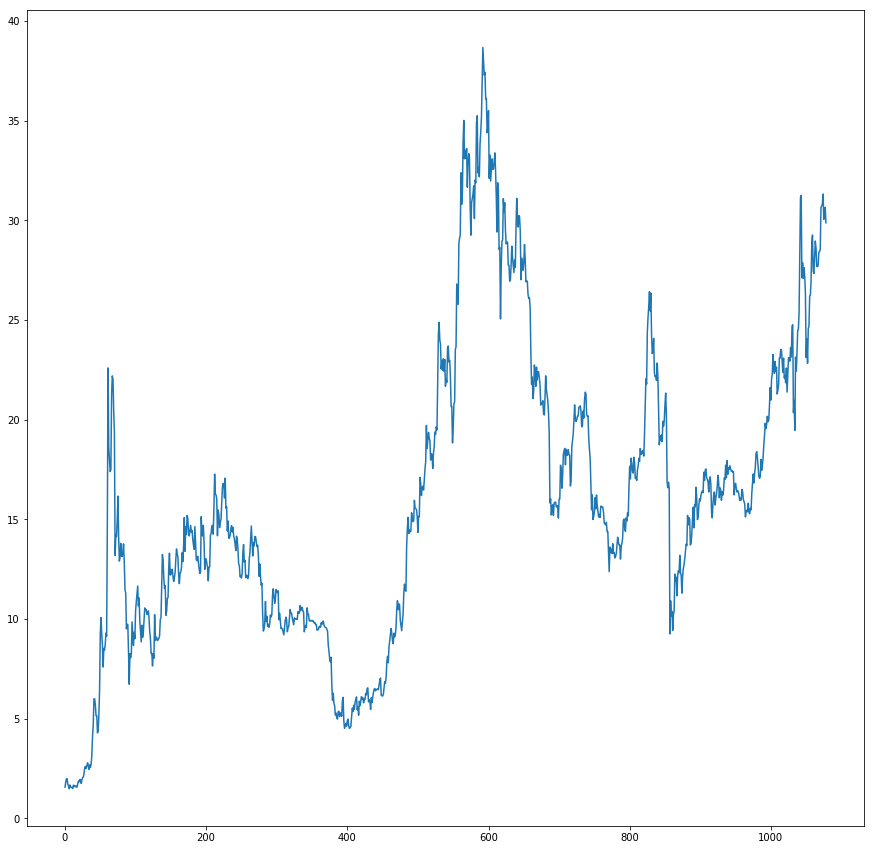

In [37]:
fig, ax = plt.subplots(1,figsize=(15,15))
ax.plot(df['close'].values)

In [ ]:
df = pd.DataFrame(klines)

In [78]:
# save df to pickle so it doesn't have to be downloaded again
df.to_pickle('test_dataset19102020.pkl')

In [79]:
# load dataset from pickle
df = pd.read_pickle('test_dataset19102020.pkl')